In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data_full_5sekres.xlsx')

In [4]:
df1 = df.copy()

In [5]:
#Create a column of load profile
df1['Load'] = df1['thrusterAndPropulsion']
df1['BaseLoad'] = 300
df1.loc[df1['operationId'] == 100, 'BaseLoad'] = 500
df1.loc[df1['operationId'] == 3, 'BaseLoad'] = 550
df1.loc[df1['operationId'] == 5, 'BaseLoad'] = 510
df1.loc[df1['operationId'] == 6, 'BaseLoad'] = 250
df1.loc[df1['operationId'] == 1, 'BaseLoad'] = 250
df1.loc[df1['operationId'] == 7, 'BaseLoad'] = 380
df1['Load'] = df1['thrusterAndPropulsion'] + df1['BaseLoad']

df1['Battery'] = 0
df1['SOC'] = 0
#Create dataset with only relevant columns
df3 = df1[['datetime', 'Load', 'engMdoPower_0_','engMdoPower_1_','engMdoPower_2_', 'engMdoPower_3_', 'operationId', 'BaseLoad', 'Battery', 'SOC']]

#Set engine powers to zero
num = df3['engMdoPower_0_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_1_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_2_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_3_']._get_numeric_data()
num[num != 0] = 0


display(df3)

,datetime,Load,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_,operationId,BaseLoad,Battery,SOC
0,2020-01-30 00:00:00,250.0,0.0,0.0,0,0.0,6.0,250,0,0
1,2020-01-30 00:00:05,250.0,0.0,0.0,0,0.0,6.0,250,0,0
2,2020-01-30 00:00:10,250.0,0.0,0.0,0,0.0,6.0,250,0,0
3,2020-01-30 00:00:15,250.0,0.0,0.0,0,0.0,6.0,250,0,0
4,2020-01-30 00:00:20,250.0,0.0,0.0,0,0.0,6.0,250,0,0
...,...,...,...,...,...,...,...,...,...,...
120955,2020-02-05 23:59:35,2046.0,0.0,0.0,0,0.0,3.0,550,0,0
120956,2020-02-05 23:59:40,1993.2,0.0,0.0,0,0.0,3.0,550,0,0
120957,2020-02-05 23:59:45,1975.6,0.0,0.0,0,0.0,3.0,550,0,0
120958,2020-02-05 23:59:50,2010.8,0.0,0.0,0,0.0,3.0,550,0,0


In [24]:
df2 = df3.copy()

load = df2['Load'].values
dg0 = df2['engMdoPower_0_'].values
dg1 = df2['engMdoPower_1_'].values
dg2 = df2['engMdoPower_2_'].values
dg3 = df2['engMdoPower_3_'].values
bat = df2['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df2['operationId'].values

for i in range(len(load)):
    if i == 120959:
        pass
    elif opid[i] == 6 and soc[i] <= 496:
        bat[i] = - 20
        soc[i+1] = soc[i] - bat[i]/720
    elif load[i] <= 2100 and load[i+1] <= 2100:
        if load[i] > 1900:
            if soc[i] > 124:
                bat[i] = 2100 - load[i]
                soc[i+1] = soc[i] - (bat[i]/720)
                dg0[i] = load[i]-bat[i]
            else:
                dg0[i] = load[i]
                soc[i+1] = soc[i]
        else:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
    elif load[i] >= 2100 and load[i+1] < 2100:
        dg0[i] = dg1[i] = load[i]/2
        soc[i+1] = soc[i]
    elif load[i] <= 2100 and load[i+1] > 2100:
        dg0[i] = dg1[i] = load[i]/2
        soc[i+1] = soc[i]
    elif load[i] <= 4200:
        if load[i] > 3800:
            if soc[i] > 124:
                bat[i] = 4200 - load[i]
                soc[i+1] = soc[i] - (bat[i]/720)
                dg0[i] = dg1[i] = (load[i]-bat[i])/2
            else:
                dg0[i] = dg1[i] = load[i]/2
                soc[i+1] = soc[i]
        else:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i] 
        

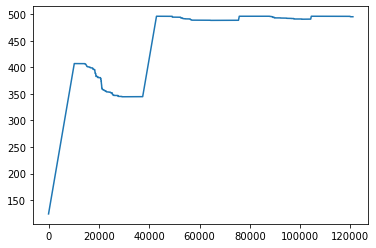

In [25]:
plt.plot(soc)

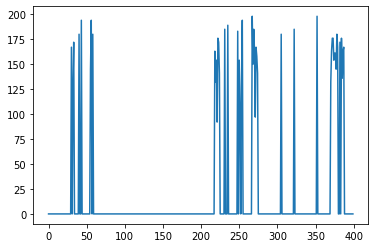

In [27]:
plt.plot(bat[20600:21000])
#plt.plot(load[18500:19000])
#plt.plot(dg0[18500:19000])

In [46]:
df4 = df3.copy()

load = df4['Load'].values
dg0 = df4['engMdoPower_0_'].values
dg1 = df4['engMdoPower_1_'].values
dg2 = df4['engMdoPower_2_'].values
dg3 = df4['engMdoPower_3_'].values
bat = df4['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df4['operationId'].values

for i in range(len(load)):
    if i == 120959:
        pass
    elif opid[i] == 6 and soc[i] <= 496:
        bat[i] = - 100
        soc[i+1] = soc[i] - bat[i]/720
    elif load[i] <= 600 and load[i+1] <= 600:
        if soc[i] > 124:
            bat[i] = load[i]
            soc[i+1] = soc[i] - (bat[i]/720)
        else:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
    elif load[i] <= 2600 and load[i+1] <= 2600:
        if load[i] > 2000:
            if soc[i] > 124:
                bat[i] = 2600 - load[i]
                soc[i+1] = soc[i] - (bat[i]/720)
                dg0[i] = load[i]-bat[i]
            elif soc[i] <= 124:
                dg0[i] = dg1[i] = load[i]/2
                soc[i+1] = soc[i]
        else:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
   # elif load[i] >= 2600 and load[i+1] < 2600:
   #     dg0[i] = dg1[i] = load[i]/2
   #     soc[i+1] = soc[i]
   # elif load[i] <= 2600 and load[i+1] > 2600:
   #     dg0[i] = dg1[i] = load[i]/2
   #     soc[i+1] = soc[i]
    elif load[i] <= 4200:
        if load[i] > 3800:
            if soc[i] > 124:
                bat[i] = 4200 - load[i]
                soc[i+1] = soc[i] - (bat[i]/720)
                dg0[i] = dg1[i] = (load[i]-bat[i])/2
            else:
                dg0[i] = dg1[i] = load[i]/2
                soc[i+1] = soc[i]
        else:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i] 

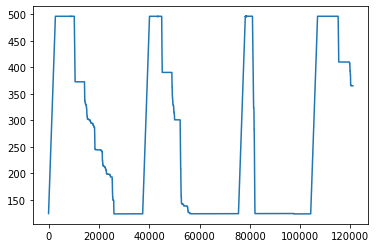

In [47]:
plt.plot(soc)

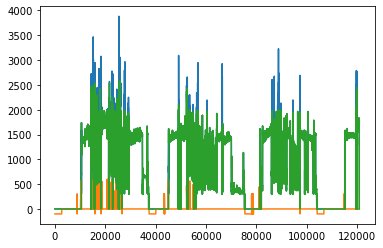

In [48]:
plt.plot(load)
plt.plot(bat)
plt.plot(dg0)
#plt.plot(dg1)

-173475

In [53]:
sumbat = 0

for a in range(len(bat)):
    if bat[a] > 0:
        sumbat += bat[a]

sumbat

904425

# Shore charging, spinning reserve and peakshaving

In [62]:
df5 = df3.copy()

load = df5['Load'].values
dg0 = df5['engMdoPower_0_'].values
dg1 = df5['engMdoPower_1_'].values
dg2 = df5['engMdoPower_2_'].values
dg3 = df5['engMdoPower_3_'].values
bat = df5['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df5['operationId'].values
shore = [0]*120960



# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if i == 120959:
        pass
    elif opid[i] == 100:
        
        if load[i] <= 2100 and soc[i] >= 200:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
            
        elif load[i] > 2100 and soc[i] >= 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
            soc[i+1] = soc[i]         

        else:
            soc[i+1] = soc[i]
            
#Transit mode
    elif opid[i] == 3 or opid[i] == 5:
#        if load[i] < 840 and soc[i] < 496:
#            bat[i] = -100
#            dg0[i] = load[i] - bat[i]
#            soc[i+1] = soc[i] - bat[i]/720 
        if load[i] <= 2100 and load[i+1] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and load[i+1] > 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i-1] < 2100 and soc[i] > 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif load[i] > 2100 and load[i-2] < 2100 and soc[i] > 124: # if the load is over 2100 for less than 10 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720            
        elif load[i] > 2100 and load[i-1] < 2100 and soc[i] <= 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i-2] < 2100 and soc[i] <= 124: # if the load is over 2100 for less than 10 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]           
        elif load[i] <= 4200 and load[i-1] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 4200:
            dg0[i] = dg1[i] = 2100
            bat[i] = load[i] - dg0[i] - dg1[i]
            soc[i+1] = soc[i] - bat[i]/720
        else:
            soc[i+1] = soc[i]
        
#Standby mode
    elif opid[i] == 7:

        if load[i] <= 2100 and load[i+1] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and load[i+1] > 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i-1] < 2100 and soc[i] > 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif load[i] > 2100 and load[i-2] < 2100 and soc[i] > 124: # if the load is over 2100 for less than 10 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
            
        elif load[i] > 2100 and load[i-1] < 2100 and soc[i] <= 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i-2] < 2100 and soc[i] <= 124: # if the load is over 2100 for less than 10 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]          
            
        elif load[i] <= 4200 and load[i-1] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 4200:
            dg0[i] = dg1[i] = 2100
            bat[i] = load[i] - dg0[i] - dg1[i]
            soc[i+1] = soc[i] - bat[i]/720
        else:
            soc[i+1] = soc[i]
            
# port
    elif opid[i] == 1 and soc[i] < 496:
        dg0[i] = load[i]# - bat[i]*1.08
        soc[i+1] = soc[i]# - bat[i]/720
    elif opid[i] == 1 and soc[i] >= 496:
        dg0[i] = load[i]
        soc[i+1] = soc[i]    
    elif opid[i] == 6 and soc[i] < 496:
        bat[i] = -50
        shore[i] = load[i] - bat[i]*1.08
        soc[i+1] = soc[i] - bat[i]/720
    elif opid[i] == 6 and soc[i] >= 496:
        shore[i] = load[i]
        soc[i+1] = soc[i] 
    else:
        soc[i+1] = soc[i]
        dg0[i] = load[i]


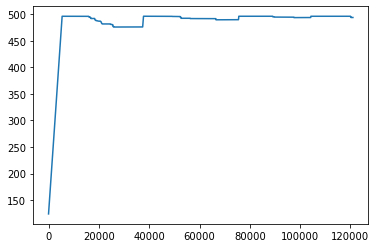

In [63]:
plt.plot(soc)

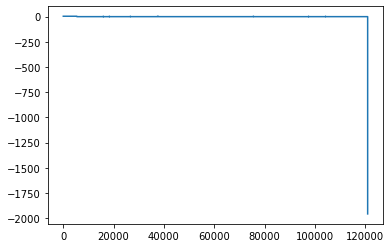

In [49]:
bal = dg0 + dg1 + dg2 + dg3 + bat + shore - load
plt.plot(bal)

In [50]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())


In [51]:
fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720

In [52]:
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 1 batteri 20% batteri start er: ', fc, 'liter')

Total fuel consumption of CASE 1 batteri 20% batteri start er:  39900.71956730115 liter


# bruk batteri 1000kW med en gang og lad i port

In [53]:
df6 = df3.copy()

load = df6['Load'].values
dg0 = df6['engMdoPower_0_'].values
dg1 = df6['engMdoPower_1_'].values
dg2 = df6['engMdoPower_2_'].values
dg3 = df6['engMdoPower_3_'].values
bat = df6['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df6['operationId'].values
shore = [0]*120960

# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if i == 120959:
        pass
    
    # DP-mode
    elif opid[i] == 100:
        
        if load[i] <= 2100 and soc[i] >= 200:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
            
        elif load[i] > 2100 and soc[i] >= 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
            soc[i+1] = soc[i]         

        else:
            soc[i+1] = soc[i]
        
#Transit mode
    elif opid[i] == 3 or opid[i] == 5:
        if soc[i] > 124 and load[i] <= 1000:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 1000 and load[i] <= 3100:
            bat[i] = 1000
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 3100:
            bat[i] = 1000
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
        
# Standby mode
    elif opid[i] == 7:
        if soc[i] > 124 and load[i] <= 1000:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 1000 and load[i] <= 3100:
            bat[i] = 1000
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 3100:
            bat[i] = 1000
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
            
#Port
    elif opid[i] == 1:
        if soc[i] > 124 and load[i] <= 1000:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 1000 and load[i] <= 3100:
            bat[i] = 1000
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 3100:
            bat[i] = 1000
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    elif opid[i] == 6:
        if soc[i] < 496:
            bat[i] = -100
            soc[i+1] = soc[i] - bat[i]/720
            shore[i] = load[i] - bat[i]
        elif soc[i] >= 496:
            shore[i] = load[i]
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i]
        dg0[i] = load[i]

In [54]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

In [55]:
fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720

In [56]:
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 1 batteri 20% batteri start og gønn battery er: ', fc, 'liter')

Total fuel consumption of CASE 1 batteri 20% batteri start og gønn battery er:  41338.29211080369 liter


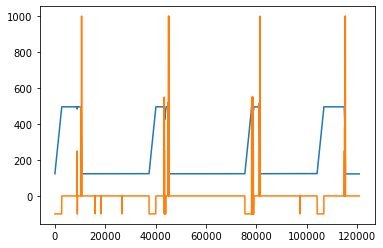

In [203]:
plt.plot(soc)#[9200:11600])
plt.plot(bat)#[9200:11600])

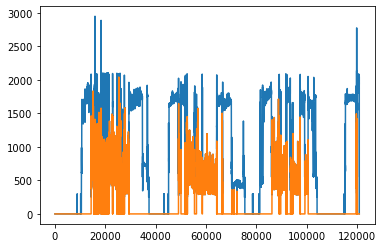

In [204]:
plt.plot(dg0)
plt.plot(dg1)

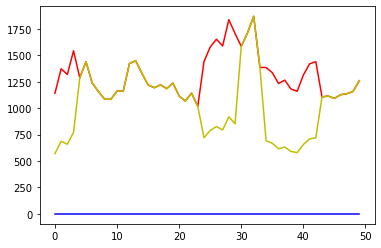

In [205]:
bal = dg0 + dg1 + bat + shore - load
#plt.plot(shore[15000:20000])
#plt.plot(bal[15400:15500])
plt.plot(load[15410:15460], color = 'r')
plt.plot(bal[15410:15460], color = 'b')
plt.plot(dg0[15410:15460], color = 'y')

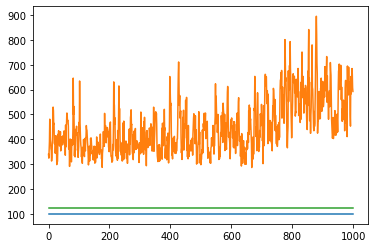

In [208]:
plt.plot(opid[59000:60000])
plt.plot(dg0[59000:60000])
plt.plot(dg1[59000:60000])
plt.plot(soc[59000:60000])

# Batteri kjører 100 kW stadig vekk

In [57]:
df7 = df3.copy()

load = df7['Load'].values
dg0 = df7['engMdoPower_0_'].values
dg1 = df7['engMdoPower_1_'].values
dg2 = df7['engMdoPower_2_'].values
dg3 = df7['engMdoPower_3_'].values
bat = df7['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df7['operationId'].values
shore = [0]*120960

# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if i == 120959:
        pass
    
    # DP-mode
    elif opid[i] == 100:
        
        if load[i] <= 2100 and soc[i] >= 200:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
            
        elif load[i] > 2100 and soc[i] >= 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
            soc[i+1] = soc[i]         

        else:
            soc[i+1] = soc[i]
        
#Transit mode
    elif opid[i] == 3 or opid[i] == 5:
        if soc[i] > 124 and load[i] <= 2200:
            bat[i] = 100
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 2200 and load[i] < 4300:
            bat[i] = 100
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
        
# Standby mode
    elif opid[i] == 7:
        if soc[i] > 124 and load[i] <= 2200:
            bat[i] = 100
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 2200 and load[i] < 4300:
            bat[i] = 100
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
#Port
    elif opid[i] == 1:
        if soc[i] > 124 and load[i] <= 2200:
            bat[i] = 100
            dg0[i] = load[i] - bat[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif soc[i] > 124 and load[i] > 2200 and load[i] < 4300:
            bat[i] = 100
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif soc[i] <= 124 and load[i] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    elif opid[i] == 6:
        if soc[i] < 496:
            bat[i] = -100
            soc[i+1] = soc[i] - bat[i]/720
            shore[i] = load[i] - bat[i]
        elif soc[i] >= 496:
            shore[i] = load[i]
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i]
        dg0[i] = load[i]

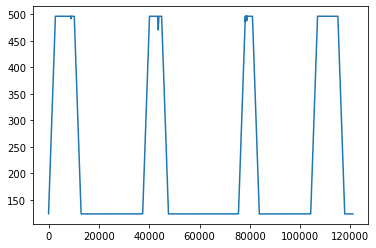

In [58]:
plt.plot(soc)

In [60]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720

fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 1 batteri 20% batteri start og gønn battery 100 er: ', fc, 'liter')

Total fuel consumption of CASE 1 batteri 20% batteri start og gønn battery 100 er:  41466.142560170876 liter


# Peakshaving i overgang fra 1 til 2 generatorer

In [39]:
df5 = df3.copy()

load = df5['Load'].values
dg0 = df5['engMdoPower_0_'].values
dg1 = df5['engMdoPower_1_'].values
dg2 = df5['engMdoPower_2_'].values
dg3 = df5['engMdoPower_3_'].values
bat = df5['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df5['operationId'].values
shore = [0]*120960



# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if i == 120959:
        pass
    elif opid[i] == 100:
        
        if load[i] <= 2100 and soc[i] >= 200:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
            
        elif load[i] > 2100 and soc[i] >= 200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 2100 and soc[i] < 200:
            dg0[i] = dg1[i] = dg3[i] = load[i]/3
            soc[i+1] = soc[i]         

        else:
            soc[i+1] = soc[i]

#Transit mode
    elif opid[i] == 3 or opid[i] == 5:
        if load[i] < 500 and soc[i] > 124:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720 
        elif load[i] <= 2100 and load[i] > 500:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] > 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] <= 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 3000: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
        
#Standby mode
    elif opid[i] == 7:
        if load[i] < 500 and soc[i] > 124:
            bat[i] = load[i]
            soc[i+1] = soc[i] - bat[i]/720 
        elif load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] > 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif load[i] > 2100 and load[i] <= 3000 and soc[i] <= 124: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        elif load[i] > 3000: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
        else:
            soc[i+1] = soc[i]
            
# port
    elif opid[i] == 1 and soc[i] < 496:
        dg0[i] = load[i]# - bat[i]*1.08
        soc[i+1] = soc[i]# - bat[i]/720
    elif opid[i] == 1 and soc[i] >= 496:
        dg0[i] = load[i]
        soc[i+1] = soc[i]    
    elif opid[i] == 6 and soc[i] < 496:
        bat[i] = -50
        shore[i] = load[i] - bat[i]*1.08
        soc[i+1] = soc[i] - bat[i]/720
    elif opid[i] == 6 and soc[i] >= 496:
        shore[i] = load[i]
        soc[i+1] = soc[i] 
    else:
        soc[i+1] = soc[i]
        dg0[i] = load[i]


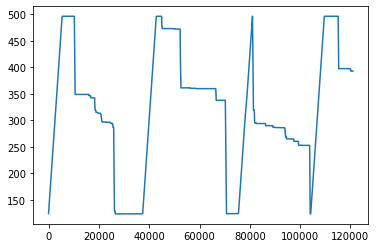

In [40]:
plt.plot(soc)

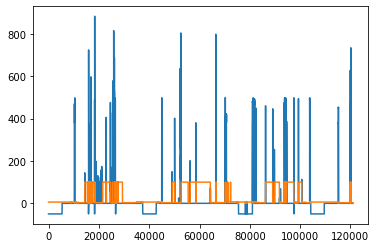

In [41]:
plt.plot(bat)
plt.plot(opid)
#plt.plot(dg1)
#plt.plot(load)

In [42]:
# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720
        
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 1 batteri mellom 1-2 gen: ', fc, 'liter')

Total fuel consumption of CASE 1 batteri mellom 1-2 gen:  39654.447474502886 liter


# Sjekker utslipp med vår utregning og generator data fra equinor

In [61]:
df10 = df.copy()
dg0 = df10['engMdoPower_0_'].values
dg1 = df10['engMdoPower_1_'].values
dg2 = df10['engMdoPower_2_'].values
dg3 = df10['engMdoPower_3_'].values

# Normalize Generators
dg0n = (dg0-dg0.min()) / (2100 - dg0.min())
dg1n = (dg1-dg1.min()) / (2100 - dg1.min())
dg2n = (dg2-dg2.min()) / (2100 - dg2.min())
dg3n = (dg3-dg3.min()) / (2100 - dg3.min())

fc_dg0 = np.zeros(120960)
fc_dg1 = np.zeros(120960)
fc_dg2 = np.zeros(120960)
fc_dg3 = np.zeros(120960)

for i in range(len(dg0)):
    if dg0[i] == 0:
        fc_dg0[i] = 0
    else:
        fc_dg0[i] = (445*dg0n[i] + 47)/720
        
for i in range(len(dg1)):
    if dg1[i] == 0:
        fc_dg1[i] = 0
    else:
        fc_dg1[i] = (445*dg1n[i] + 47)/720
        
for i in range(len(dg2)):
    if dg2[i] == 0:
        fc_dg2[i] = 0
    else:
        fc_dg2[i] = (445*dg2n[i] + 47)/720
        
for i in range(len(dg3)):
    if dg3[i] == 0:
        fc_dg3[i] = 0
    else:
        fc_dg3[i] = (445*dg3n[i] + 47)/720
        
fc = sum(fc_dg0) + sum(fc_dg1) + sum(fc_dg2) + sum(fc_dg3)
print('Total fuel consumption of CASE 1 batteri mellom 1-2 gen: ', fc, 'liter')

Total fuel consumption of CASE 1 batteri mellom 1-2 gen:  43278.00052810888 liter
